# Team Project 3 - Solving a System of Linear Equations

In this project, we compare the performance of three different methods of solving a system of linear equations. 

#### 1. (10 pts) Create a function randmat(n) which returns a random square matrix constructed as the following recipe. 
<ul>
    <li>The size of the matrix is $n \times n$.</li>
    <li>Each off-diagonal entry ($a_{ij}$ where $i \ne j$) is a random number in $[0, 1)$. A random number can be constructed by the random method (see <a href="https://docs.scipy.org/doc/numpy/reference/routines.random.html">here</a>.</li>
    <li>A diagonal entry $a_{ii}$ is a random number in $[n, n+1)$. (This condition may look like artificial, but we will discuss the reason during the class.)</li>
</ul>

#### And create a function randvec(n) which returns an $n$-dimensional random vector whose entries are random numbers in $[0, 100)$. 

In [3]:
def randmatrix(n):
    matrix = np.empty((n, n))           
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = np.random.uniform(n, n+1) 
            if i != j:
                matrix[i][j] = np.random.random()
    return matrix

def randvec(n):
    vector = np.random.randint(0,100,size=n)
    return vector

#### 2. (10 pts) Create a function GaussElim(A, b) which solves a system of linear equations $Ax = b$ by using Gaussian Elimination without pivoting. DO NOT use solve method in the linear algebra package! You have to make a code for it. 

In [ ]:
#Calculates the forward part of Gaussian elimination.
def forwardElim(A, b, n):
    for row in range(0, n-1):                   
        for i in range(row+1, n):               
            ratio = A[i,row] / A[row,row]
            for j in range(row, n):
                A[i,j] = A[i,j] - (ratio * A[row,j])

            b[i] = b[i] - (ratio * b[row])
        #print("[A|b]:\n",np.column_stack((A,b)))
        #print("A = \n%s \nand b = \n%s\n" % (A, b[:,None]))
            
    return A, b

# Does back substitution, returns the Gauss result.
def backwardSub(a, b, n):
    #x = np.zeros((n,1)) #x-vector of 0's
    x = np.zeros(n)
    x[n-1] = b[n-1] / a[n-1, n-1]
    for row in range(n-2, -1, -1):  #decrement by 1 
        sumNums = b[row]
        for j in range(row+1, n):
            sumNums = sumNums - a[row,j] * x[j]
        x[row] = sumNums / a[row,row]
    return x

#Gauss Elimination without pivoting 
def GaussElim(A, b):
    n = np.size(b)
    A, b = forwardElim(A, b, n)
    return backwardSub(A, b, n)

#### 3. (10 pts) Create a function Jacobi(A, b, err) which solves a system of linear equations $Ax = b$ by using Jacobi interation method. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [ ]:
import numpy as np

def Jacobi(A, b, err):
    n = np.size(b)
    D = np.zeros((n,n))
    for i in range(n): #make D the diagonal
        D[i,i] = A[i,i]
    O = A - D #O is A with diagonal turned to 0's
    for i in range(n): #invert D
        D[i,i] = 1/D[i,i]
    x_current = np.zeros(n)
    err_now = err + 1
   
    while err_now > err: #iterative computation until error is small
        x_prev = x_current
        x_current = np.dot(D,b - np.dot(O,x_prev))
        err_now = abs(np.amax(x_current - x_prev))
    return x_current

#### 4. (10 pts) Create a function GaussSeidel(A, b, err) which solves a system of linear equations $Ax = b$ by using Gauss-Seidel interation method. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [ ]:

def GaussSeidel(A, b, err):
    n = np.size(b)
    U = np.zeros((n,n))
    DL = np.zeros((n,n)) #this matrix is D+L from lecture 
    #O = A - D #O is A with diagonal turned to 0's
    for i in range(n):
        for j in range(n):
            if i >= j:
                DL[i,j] = A[i,j]
            if i < j:
                U[i,j] = A[i,j]
    DL_inv = np.linalg.solve(DL,np.identity(n)) #invert DL
    x_current = np.zeros(n)
    err_now = err + 1 
    
    while err_now > err: #iterative computation until error is small 
        x_prev = x_current
        x_current = np.dot(DL_inv, (b-np.dot(U,x_prev)))
        err_now = abs(np.amax(x_current - x_prev))
    return x_current

#### 5. (10 pts) For $n = 100, 200, 300, \cdots , 1000$, create a random $n \times n$ matrix $A$ and a random $n$-dimensional vector $b$. Solve the system of linear equations $Ax = b$ by using GaussElim(A, b), Jacobi(A, b, err), and GaussSeidel(A, b, err). Use $10^{-6}$ for the error tolerance. Record the excution time for each method. Plot the graph of the excution time for those three methods on the same plane.

For the computation of the excution time, you may use the following method:

In [ ]:
import time

start = time.time()
"the code you want to test stays here"
end = time.time()

print(end - start)


Size of Matrix: 100 x 100
Size b vector: 100
Gaussian Elim TIME: 0.173518
Jacobi Time: 0.000000
Gauss-Seidel Time: 0.003018

Size of Matrix: 200 x 200
Size b vector: 200
Gaussian Elim TIME: 1.427215
Jacobi Time: 0.000969
Gauss-Seidel Time: 0.009968

Size of Matrix: 300 x 300
Size b vector: 300
Gaussian Elim TIME: 4.050198
Jacobi Time: 0.000965
Gauss-Seidel Time: 0.023935

Size of Matrix: 400 x 400
Size b vector: 400
Gaussian Elim TIME: 9.618540
Jacobi Time: 0.001959
Gauss-Seidel Time: 0.041886

Size of Matrix: 500 x 500
Size b vector: 500
Gaussian Elim TIME: 22.355250
Jacobi Time: 0.002929
Gauss-Seidel Time: 0.066823

Size of Matrix: 600 x 600
Size b vector: 600
Gaussian Elim TIME: 30.470513
Jacobi Time: 0.003953
Gauss-Seidel Time: 0.095743

Size of Matrix: 700 x 700
Size b vector: 700
Gaussian Elim TIME: 51.086436
Jacobi Time: 0.005985
Gauss-Seidel Time: 0.143617

Size of Matrix: 800 x 800
Size b vector: 800
Gaussian Elim TIME: 80.458954
Jacobi Time: 0.009911
Gauss-Seidel Time: 0.178

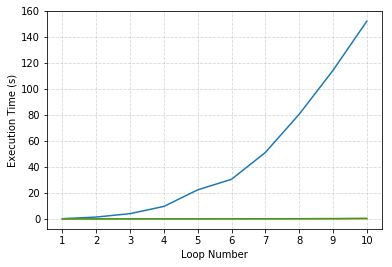

NOTE: The loop number on the x-axis corresponds with the dimesion of the matrix the loop is currently working with
In this case, x=1 represents the 100x100 coeff matrix, x=2 represents the 200x200 coeff matrix and so on
TOTAL RUTIME:
470.4932267665863


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt


def GaussSeidel(A, b, err):
    n = np.size(b)
    U = np.zeros((n,n))
    DL = np.zeros((n,n)) #this matrix is D+L from lecture 
    #O = A - D #O is A with diagonal turned to 0's
    for i in range(n):
        for j in range(n):
            if i >= j:
                DL[i,j] = A[i,j]
            if i < j:
                U[i,j] = A[i,j]
    DL_inv = np.linalg.solve(DL,np.identity(n)) #invert DL
    x_current = np.zeros(n)
    err_now = err + 1 
    
    while err_now > err: #iterative computation until error is small 
        x_prev = x_current
        x_current = np.dot(DL_inv, (b-np.dot(U,x_prev)))
        err_now = abs(np.amax(x_current - x_prev))
    return x_current

def Jacobi(A1, b, err):
    n = np.size(b)
    D = np.zeros((n,n)) 
    for i in range(n): #make D the diagonal
        D[i,i] = A1[i,i]
    O = A1 - D #O is A with diagonal turned to 0's
    for i in range(n): #invert D
        D[i,i] = 1/D[i,i]
    x_current = np.zeros(n)
    err_now = err + 1 
    
    while err_now > err: #iterative computation until error is small 
        x_prev = x_current
        x_current = np.dot(D,b - np.dot(O,x_prev)) 
        err_now = abs(np.amax(x_current - x_prev))
    return x_current

#random matrix of size nxn 
def randmatrix(n):
    matrix = np.empty((n, n))           
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = np.random.uniform(n, n+1)
            if i != j:
                matrix[i][j] = np.random.random()
    return matrix

#random n-dimensional vector
def randvec(n):
    vector = np.random.randint(0,100,size=n)
    return vector

#Calculates the forward part of Gaussian elimination.
def forwardElim(A, b, n):
    for row in range(0, n-1):                   
        for i in range(row+1, n):               
            ratio = A[i,row] / A[row,row]
            for j in range(row, n):
                A[i,j] = A[i,j] - (ratio * A[row,j])

            b[i] = b[i] - (ratio * b[row])
        #print("[A|b]:\n",np.column_stack((A,b)))
        #print("A = \n%s \nand b = \n%s\n" % (A, b[:,None]))
            
    return A, b

# Does back substitution, returns the Gauss result.
def backwardSub(a, b, n):
    #x = np.zeros((n,1)) #x-vector of 0's
    x = np.zeros(n)
    x[n-1] = b[n-1] / a[n-1, n-1]
    for row in range(n-2, -1, -1):  #decrement by 1 
        sumNums = b[row]
        for j in range(row+1, n):
            sumNums = sumNums - a[row,j] * x[j]
        x[row] = sumNums / a[row,row]
    return x

#Gauss Elimination without pivoting 
def GaussElim(A, b):
    n = np.size(b)
    A, b = forwardElim(A, b, n)
    return backwardSub(A, b, n)

def main():
    loopLength = 10
    multiplier = 100
    err = 10**-6
    gaussElimTimeArray = np.zeros(loopLength)
    jacobiTimeArray = np.zeros(loopLength)
    gaussSeidelTimeArray = np.zeros(loopLength)

    for i in range (loopLength):
        #Creates the indexing system and the random matricies and vectors of correct size
        num = (i+1)*multiplier
        currMatrix = randmatrix(num)
        copyMatrix = currMatrix + np.zeros((num,num))
        vector_b = randvec(num)
        vector_copy = vector_b + np.zeros(num)
        print ()
        print ("Size of Matrix: %d x %d" % (num, num))
        print ("Size b vector: %d" % vector_b.size)
        
        
        #Gaussian Elimination 
        start = time.time()
        x = GaussElim(currMatrix,vector_b)
        #y = np.linalg.solve(copyMatrix, vector_copy)
        end = time.time()
        print ("Gaussian Elim TIME: %f" % (end-start))
        gaussElimTimeArray[i]= (end-start)
       
    
        #Jacobi
        start = time.time()
        x2 = Jacobi(copyMatrix,vector_copy, 10**-6)
        end = time.time()
        print ("Jacobi Time: %f" % (end-start))
        jacobiTimeArray[i] = (end-start)
        
        #Gauss-Seidel Time
        start = time.time()
        x3 = GaussSeidel(copyMatrix, vector_copy, 10**-6)
        end = time.time()
        print ("Gauss-Seidel Time: %f" % (end-start))
        gaussSeidelTimeArray[i] = (end-start)
        
        
    print ()
    print ("Gaussian Elim Time Array: ")
    print (gaussElimTimeArray)
    print ("Jacobi Time Array: ")
    print (jacobiTimeArray)
    print ("Gauss_Seidel Time Array: ")
    print (gaussSeidelTimeArray)
    print ()
    
    
    xs = np.arange(1,loopLength+1, 1.0)
    plt.xticks(np.arange(1,loopLength+1, 1.0))
    plt.grid(alpha=0.5,linestyle='--')
    plt.xlabel("Loop Number")
    plt.ylabel("Execution Time (s)")
    plt.plot(xs, gaussElimTimeArray)
    plt.plot(xs, jacobiTimeArray)
    plt.plot(xs, gaussSeidelTimeArray)
    plt.show()
    print ("NOTE: The loop number on the x-axis corresponds with the dimesion of the matrix the loop is currently working with")
    print ("In this case, x=1 represents the 100x100 coeff matrix, x=2 represents the 200x200 coeff matrix and so on")
    
total_runtime_start = time.time()
main()
total_runtime_end = time.time()

print('TOTAL RUTIME:')
print(total_runtime_end - total_runtime_start)

Well, if you are interested in, then you can make a code using the "theoretically simplest method". For $Ax = b$, $x = A^{-1}b$. By using Gauss Elimination, you may compute $A^{-1}$ and then compute $A^{-1}b$. Recall that one can compute $A^{-1}$ as the following:
<ul>
    <li>Make an augmented matrix $[A | I]$ where $I$ is the $n \times n$ identity matrix.</li>
    <li>Apply elementary row operations until the left half $A$ on $[A| I]$ becomes $I$.</li>
    <li>Then the right half of the augmented matrix is $A^{-1}$.</li>
</ul>
Compare the performance of this method with above three methods.